## Restaurant's cuisine ratings(EDA)


Some questions can be answered:<br>
Q: Visualizing the food rating as per their origin in both the genders category<br>
Q: Visualizing on basis of other criteria such as marital status or profession the rating they give.<br>

In [1]:
#importing all the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

#### Data reading and Cleaning

In [2]:
data=pd.read_csv("Cuisine_rating.csv")

In [3]:
data.head()

,User ID,Area code,Location,Gender,YOB,Marital Status,Activity,Budget,Cuisines,Alcohol,Smoker,Food Rating,Service Rating,Overall Rating,Often A S
0,1,153,"Upper East Side,NY",Female,2006,Single,Professional,3,Japanese,Never,Never,5,4,4.5,No
1,2,123,"St. George,NY",Female,1991,Married,Student,3,Indian,Never,Socially,1,1,1.0,No
2,3,122,"Upper West Side,NY",Male,1977,Single,Student,5,Seafood,Often,Often,5,5,5.0,Yes
3,4,153,"Upper East Side,NY",Female,1956,Married,Professional,5,Japanese,Never,Socially,3,1,2.0,No
4,5,129,"Central Park,NY",Male,1997,Single,Student,4,Filipino,Socially,Never,2,4,3.0,No


In [4]:
data.columns

Index(['User ID', 'Area code', 'Location', 'Gender', 'YOB', 'Marital Status',
       'Activity', 'Budget', 'Cuisines', 'Alcohol ', 'Smoker', 'Food Rating',
       'Service Rating', 'Overall Rating', 'Often A S'],
      dtype='object')

In [5]:
data.duplicated().sum()  #No duplicated data involved

0

In [6]:
#checking for null values

data.isnull().sum()

User ID           0
Area code         0
Location          0
Gender            0
YOB               0
Marital Status    0
Activity          0
Budget            0
Cuisines          0
Alcohol           0
Smoker            0
Food Rating       0
Service Rating    0
Overall Rating    0
Often A S         0
dtype: int64

In [7]:
#NO null values....that's great.

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   User ID         200 non-null    int64  
 1   Area code       200 non-null    int64  
 2   Location        200 non-null    object 
 3   Gender          200 non-null    object 
 4   YOB             200 non-null    int64  
 5   Marital Status  200 non-null    object 
 6   Activity        200 non-null    object 
 7   Budget          200 non-null    int64  
 8   Cuisines        200 non-null    object 
 9   Alcohol         200 non-null    object 
 10  Smoker          200 non-null    object 
 11  Food Rating     200 non-null    int64  
 12  Service Rating  200 non-null    int64  
 13  Overall Rating  200 non-null    float64
 14  Often A S       200 non-null    object 
dtypes: float64(1), int64(6), object(8)
memory usage: 23.6+ KB


In [9]:
data.describe()

,User ID,Area code,YOB,Budget,Food Rating,Service Rating,Overall Rating
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,141.060000,1984.830000,3.815000,3.220000,3.230000,3.225000
std,57.879185,26.130257,16.809339,1.056578,1.411226,1.526022,1.079445
min,1.000000,101.000000,1955.000000,1.000000,1.000000,1.000000,1.000000
25%,50.750000,123.000000,1971.000000,3.000000,2.000000,2.000000,2.500000
50%,100.500000,135.000000,1987.000000,4.000000,3.000000,3.000000,3.000000
75%,150.250000,158.000000,2000.000000,5.000000,5.000000,5.000000,4.000000
max,200.000000,199.000000,2009.000000,5.000000,5.000000,5.000000,5.000000


In [10]:
data.nunique()

User ID           200
Area code          65
Location           10
Gender              2
YOB                46
Marital Status      3
Activity            2
Budget              5
Cuisines            7
Alcohol             3
Smoker              3
Food Rating         5
Service Rating      5
Overall Rating      9
Often A S           2
dtype: int64

In [11]:
data['Marital Status'].unique()   #this gives all the ratings range

array(['Single', 'Married', 'Divorced'], dtype=object)

In [12]:
data['Activity'].unique()

array(['Professional', 'Student'], dtype=object)

#### Exploring and visualizing

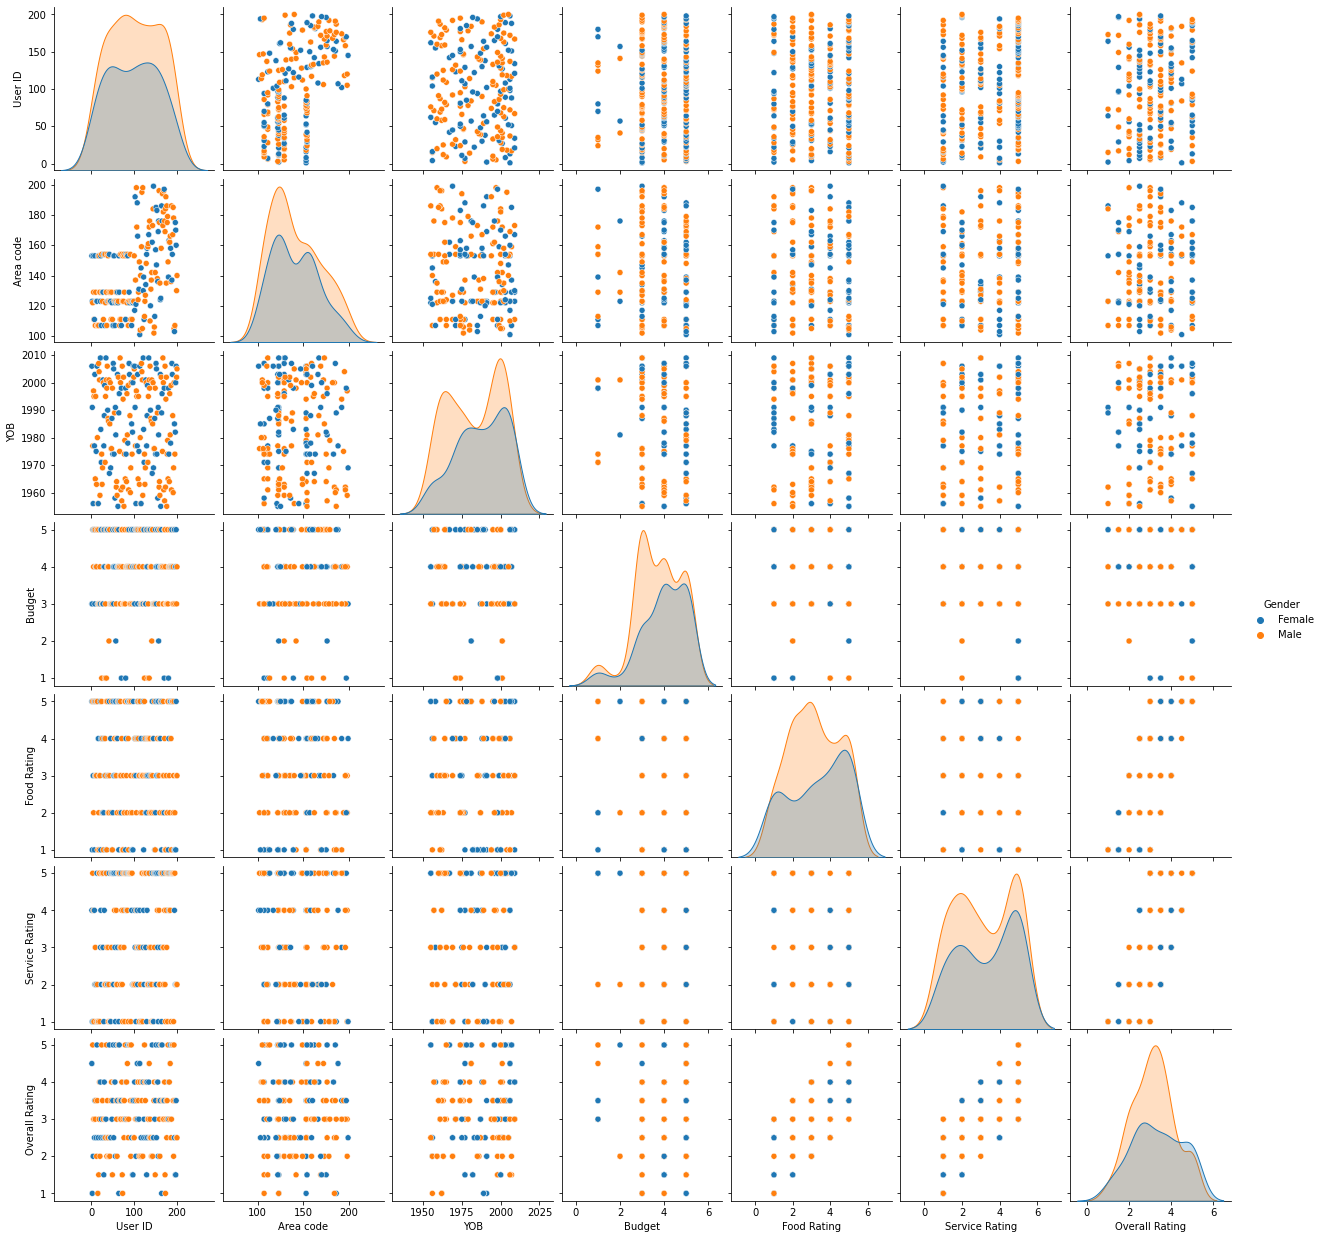

In [13]:
sns.pairplot(data,hue='Gender')

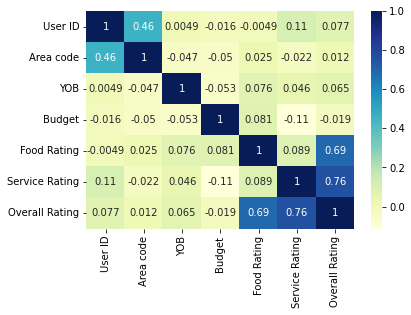

In [14]:
#too hard find any relation..so checking for correlation
cor=data.corr('spearman')
sns.heatmap(cor, annot = True, cmap="YlGnBu")
plt.show()

##### Findings:-
- Hard to detect any relation but there is a correlation's with food rating & service rating on overall rating
- so we will group the required columns and will have a individual check

In [15]:
data['Cuisines'].unique()

array(['Japanese', 'Indian', 'Seafood', 'Filipino', 'Italian', 'Chinese',
       'French'], dtype=object)

In [16]:
top_5_cuisines=round(data.groupby('Cuisines')['Food Rating'].mean().sort_values(ascending=False),2)
top_5_cuisines 

Cuisines
Japanese    3.86
Chinese     3.46
French      3.29
Seafood     3.23
Italian     3.22
Indian      2.78
Filipino    2.71
Name: Food Rating, dtype: float64

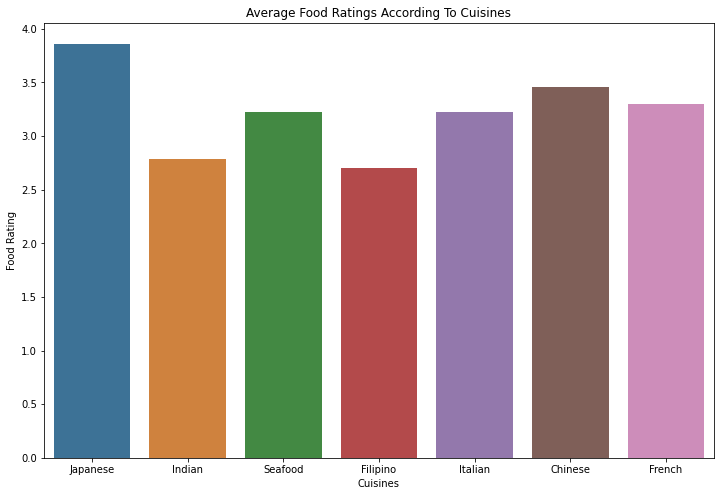

In [18]:
plt.figure(figsize=(12,8))
sns.barplot('Cuisines','Food Rating',data=data,ci=0,saturation=0.6,)
plt.title("Average Food Ratings According To Cuisines")
plt.show()

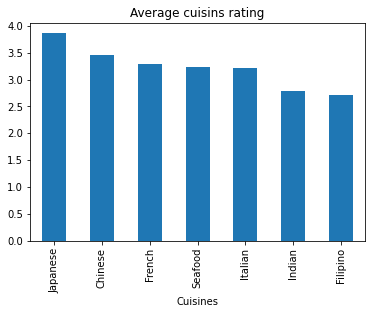

In [19]:
top_5_cuisines.plot(kind="bar")
plt.title("Average cuisins rating")
plt.show()

##### Findings:
- Japanese cuisines has higher ratings and filipino has the least rating.
- In the above plot we can see the order of cuisines ratings

In [20]:
data.Gender.value_counts()  #minor imbalance with Gender..we will go with mean instead of sum

Male      118
Female     82
Name: Gender, dtype: int64

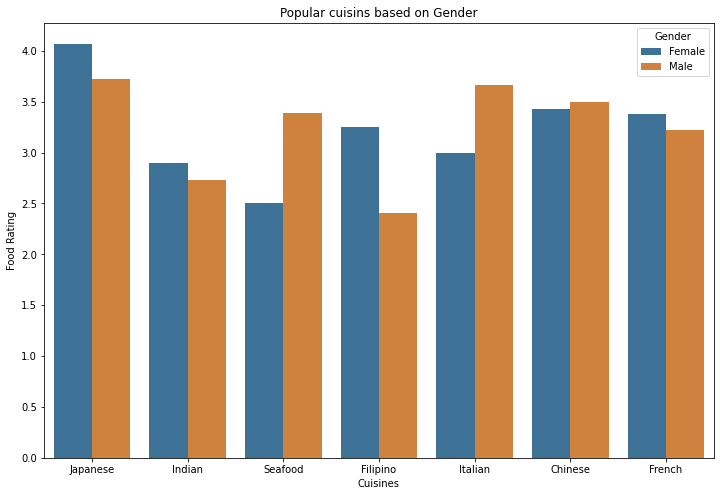

In [22]:
#Now lets have a look how gender effects the ratings

plt.figure(figsize=(12,8))
sns.barplot('Cuisines','Food Rating',data=data,ci=0,saturation=0.6,hue="Gender",estimator=np.mean)
plt.title("Popular cuisins based on Gender")
plt.show()

##### Findings:-
- Female's prefer Japanese compared with Male's
- Male's Seafood compared with Female's

In [23]:
data['Marital Status'].value_counts()

Single      100
Married      86
Divorced     14
Name: Marital Status, dtype: int64

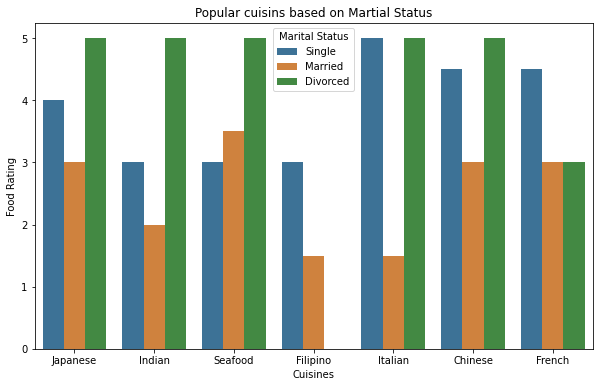

In [24]:
#lets check how does marriage effect

plt.figure(figsize=(10,6))
sns.barplot('Cuisines','Food Rating',data=data,ci=0,saturation=0.6,hue="Marital Status",estimator=np.median)
plt.title("Popular cuisins based on Martial Status")
plt.show()



##### Findings:-
- Single had a good rating with all cuisins except seafood
- Married are better with Seafoods and not  so good with Italian and Filipino
- This gives insight's  on divorced are okay with any cuisines but a bit below average with Filipino & French

In [25]:
#lets see how does profession affect
data.columns

Index(['User ID', 'Area code', 'Location', 'Gender', 'YOB', 'Marital Status',
       'Activity', 'Budget', 'Cuisines', 'Alcohol ', 'Smoker', 'Food Rating',
       'Service Rating', 'Overall Rating', 'Often A S'],
      dtype='object')

In [26]:
data['Activity'].value_counts()

Student         120
Professional     80
Name: Activity, dtype: int64

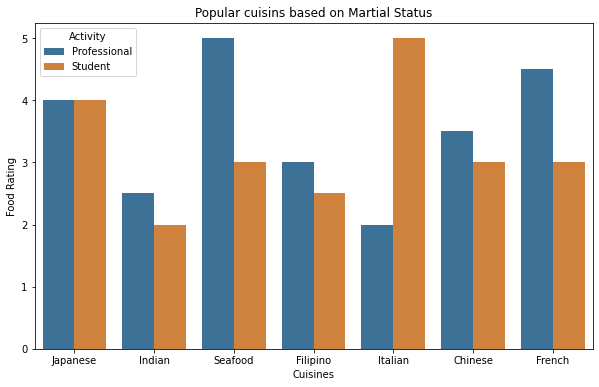

In [27]:
plt.figure(figsize=(10,6))
sns.barplot('Cuisines','Food Rating',data=data,ci=0,saturation=0.6,hue='Activity',estimator=np.median)
plt.title("Popular cuisins based on Martial Status")
plt.show()

##### Findings:-
- Professional likes the seafood more & Students like Italian a lot

In [28]:
#top 5 high ratings by female

data[(data.Gender=="Female") & (data['Food Rating']== max(data['Food Rating'])) ].head(10)

,User ID,Area code,Location,Gender,YOB,Marital Status,Activity,Budget,Cuisines,Alcohol,Smoker,Food Rating,Service Rating,Overall Rating,Often A S
0,1,153,"Upper East Side,NY",Female,2006,Single,Professional,3,Japanese,Never,Never,5,4,4.5,No
7,8,153,"Upper East Side,NY",Female,2003,Single,Professional,3,Filipino,Often,Often,5,2,3.5,Yes
12,13,123,"St. George,NY",Female,2006,Single,Professional,5,Chinese,Socially,Never,5,5,5.0,No
20,21,123,"St. George,NY",Female,2009,Single,Student,3,Indian,Socially,Often,5,3,4.0,No
41,42,154,"Market City, NY",Female,1967,Single,Student,5,Filipino,Often,Socially,5,5,5.0,No
50,51,107,"Riverdale,NY",Female,2007,Single,Student,4,Japanese,Often,Often,5,5,5.0,Yes
54,55,107,"Riverdale,NY",Female,1958,Single,Professional,5,Filipino,Socially,Socially,5,3,4.0,No
56,57,123,"St. George,NY",Female,1981,Divorced,Student,2,Italian,Socially,Often,5,5,5.0,No
61,62,122,"Upper West Side,NY",Female,1955,Divorced,Professional,4,Japanese,Never,Often,5,5,5.0,No
64,65,129,"Central Park,NY",Female,1996,Single,Student,4,Italian,Never,Never,5,5,5.0,No


In [29]:
#top 5 high ratings by male

data[(data.Gender=="Male") & (data['Food Rating']== max(data['Food Rating'])) ].head(10)

,User ID,Area code,Location,Gender,YOB,Marital Status,Activity,Budget,Cuisines,Alcohol,Smoker,Food Rating,Service Rating,Overall Rating,Often A S
2,3,122,"Upper West Side,NY",Male,1977,Single,Student,5,Seafood,Often,Often,5,5,5.0,Yes
5,6,111,"China Town, NY",Male,1995,Single,Student,5,Seafood,Never,Never,5,1,3.0,No
9,10,129,"Central Park,NY",Male,1995,Single,Student,4,Chinese,Often,Often,5,2,3.5,Yes
13,14,107,"Riverdale,NY",Male,1980,Single,Student,5,Italian,Often,Socially,5,2,3.5,No
23,24,154,"Market City, NY",Male,1974,Divorced,Professional,1,Seafood,Socially,Often,5,5,5.0,No
34,35,129,"Central Park,NY",Male,2001,Divorced,Student,1,Japanese,Socially,Often,5,5,5.0,No
36,37,154,"Market City, NY",Male,2006,Single,Student,4,Japanese,Often,Often,5,2,3.5,Yes
46,47,129,"Central Park,ny",Male,1976,Single,Professional,3,French,Often,Socially,5,3,4.0,No
62,63,123,"St. George,NY",Male,2002,Single,Student,4,Japanese,Never,Often,5,5,5.0,No
67,68,154,"Market City, NY",Male,2000,Married,Professional,3,Indian,Never,Often,5,2,3.5,No


<bold> ---------------------------------------------------------------------------------------------------------------------------------------------------

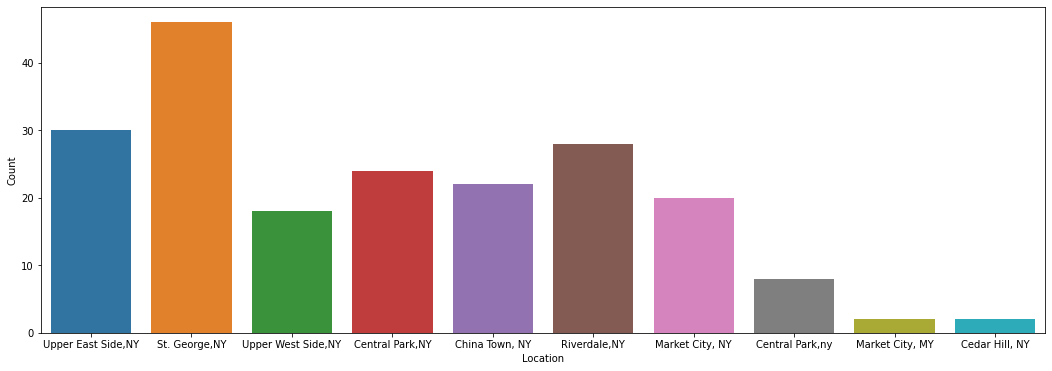

In [30]:
#lets have a look at preferred location
plt.figure(figsize=(18,6))
sns.countplot(data['Location'])
plt.ylabel("Count")
plt.xlabel("Location")
plt.show()

##### Finding:- <br> 
- st.George,Ny is the most prefered location

In [31]:
#alcoholic data
alcohol_consumption=data.groupby(["Alcohol ","Gender"])["User ID"].count()
alcohol_consumption

Alcohol   Gender
Never     Female    40
          Male      48
Often     Female    25
          Male      36
Socially  Female    17
          Male      34
Name: User ID, dtype: int64

In [32]:
#smokers data
smokers=data.groupby(["Smoker","Gender"])["User ID"].count()
smokers

Smoker    Gender
Never     Female    20
          Male      39
Often     Female    28
          Male      42
Socially  Female    34
          Male      37
Name: User ID, dtype: int64

In [33]:
#Budgets According To Cuisines

In [36]:
budget_cuisine=round(data.groupby(["Cuisines"])["Budget"].mean().sort_values(),2)
budget_cuisine

Cuisines
Indian      3.41
Seafood     3.55
Filipino    3.71
Italian     3.89
French      3.94
Chinese     4.08
Japanese    4.11
Name: Budget, dtype: float64

Text(0.5, 1.0, 'Budgets According To Cuisines')

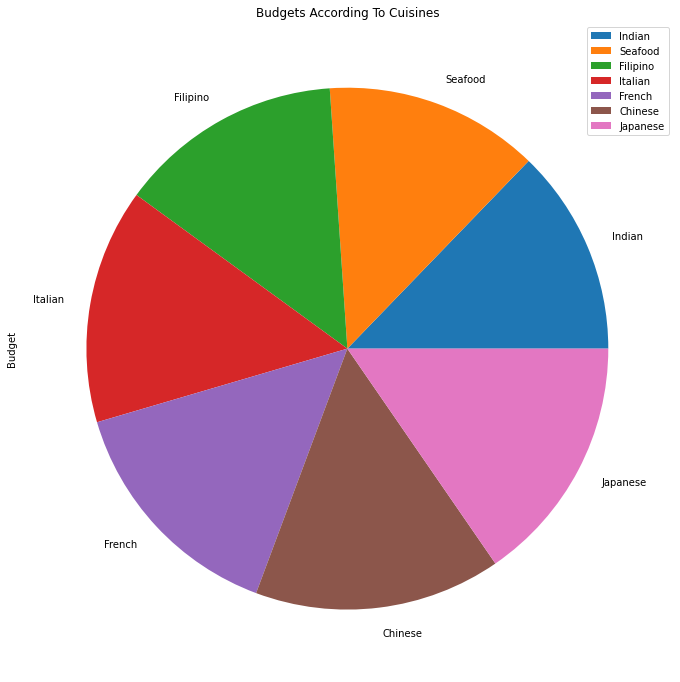

In [37]:
plt.figure(figsize=(15,12))
budget_cuisine.plot(kind='pie')
plt.legend()
plt.title("Budgets According To Cuisines")

##### Findings:-
- Japneses & French Cuisines are most expensive and Italian & seafood are least expensive

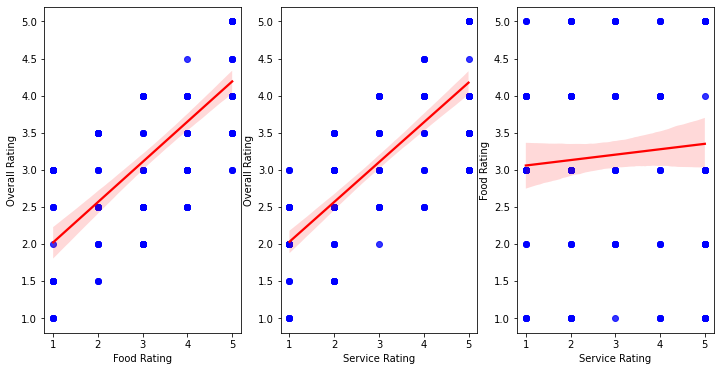

In [38]:
#Lets see how ratings vary

plt.figure(figsize=(12,6))
plt.figure(1)
plt.subplot(131)
sns.regplot(x='Food Rating', y='Overall Rating',data=data,scatter_kws={"color":"blue"}, line_kws={"color":"red"})
plt.subplot(132)
sns.regplot(x='Service Rating', y='Overall Rating',data=data,scatter_kws={"color":"blue"}, line_kws={"color":"red"})
plt.subplot(133)
sns.regplot(x='Service Rating', y='Food Rating',data=data,scatter_kws={"color":"blue"}, line_kws={"color":"red"})
plt.show()

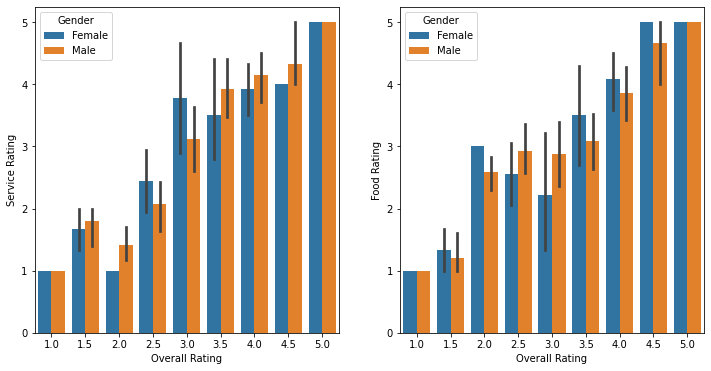

In [39]:
plt.figure(figsize=(12,6))
plt.figure(1)
plt.subplot(121)
sns.barplot(x="Overall Rating",y='Service Rating',data=data, hue="Gender",estimator=np.mean)
plt.subplot(122)
sns.barplot(x="Overall Rating",y='Food Rating',data=data, hue="Gender",estimator=np.mean)
plt.show()

##### Findings:- 
- Overall rating depends a lot on food and service rating
- Ratings by Gender looks fair neutral

### FINAL CONCLUSION:- 

- Japanese, Seafood, Chinese cuisines are having above Average and higher ratings compared with other Cuisines. 
- Everyone like males,females,divorced,married,students,professionals prefer them a lot and provided their ratings above average (i.e Ratings above 3) . 
- Budget spent on japanese and chinese are more and even the rest of the cuisines maintain them above average.
- Overall ratings are taken care, if food and the respective service's of the restaurent were well maintained.
- So, it will be a good Choice for the restaurent's to include the above priorities.
